In [1]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
import time

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# Target Account
target_users = ['@BBCWorld', '@CBS', '@CNN', '@FoxNews', '@nytimes']

all_user_list = []
all_timestamp_list = []
all_compound_list = []
all_pos_list = []
all_neu_list = []
all_neg_list = []
all_text_list = []
all_sentiment_list = []
all_tweets_ago_list = []


# Loop through all targer terms
for target_user in target_users:
    

    # Variables for holding sentiments
    user_list = []
    timestamp_list = []
    compound_list = []
    pos_list = []
    neu_list = []
    neg_list = []
    text_list = []
    tweets_ago_list = []
    tweet_count = 0

    for x in range(5):
        public_tweets = api.user_timeline(target_user, page=x)

        for tweet in public_tweets:
            timestamp = tweet["created_at"]
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            user_list.append(tweet["user"]["screen_name"])
            
            timestamp_list.append(timestamp)
            compound_list.append(compound)
            pos_list.append(pos)
            neu_list.append(neu)
            neg_list.append(neg)
            text_list.append(tweet["text"])
            tweet_count += 1
            tweets_ago_list.append(tweet_count)
    
            
    all_user_list.append(user_list)
    all_timestamp_list.append(timestamp_list)
    all_compound_list.append(compound_list)
    all_pos_list.append(pos_list)
    all_neu_list.append(neu_list)
    all_neg_list.append(neg_list)
    all_text_list.append(text_list)
    all_tweets_ago_list.append(tweets_ago_list)
            
        
    sentiments = np.mean(compound_list)
    all_sentiment_list.append(sentiments)



In [3]:
all_user_list = np.array(all_user_list).flatten().tolist()
all_timestamp_list = np.array(all_timestamp_list).flatten().tolist()
all_compound_list = np.array(all_compound_list).flatten().tolist()
all_pos_list = np.array(all_pos_list).flatten().tolist()
all_neu_list = np.array(all_neu_list).flatten().tolist()
all_neg_list = np.array(all_neg_list).flatten().tolist()
all_text_list = np.array(all_text_list).flatten().tolist()
all_tweets_ago_list = np.array(all_tweets_ago_list).flatten().tolist()



sentiment = {'User': all_user_list, 'Timestamp': all_timestamp_list, 'Compound_Score': all_compound_list, 'Pos_Score': all_pos_list, 'Neu_Score': all_neu_list, 'Neg_Score': all_neg_list, 'Tweets_Ago': all_tweets_ago_list, 'Tweet_Text': all_text_list}
sentiment_df = pd.DataFrame(sentiment)
sentiment_df.to_csv("Sentiment Analysis.csv", index=False, header=True)
sentiment_df

,User,Timestamp,Compound_Score,Pos_Score,Neu_Score,Neg_Score,Tweets_Ago,Tweet_Text
0,BBCWorld,Sat Oct 06 01:10:04 +0000 2018,-0.3182,0.000,0.723,0.277,1,Have Russian spies lost their touch? https://t...
1,BBCWorld,Sat Oct 06 00:40:35 +0000 2018,-0.6461,0.000,0.652,0.348,2,Brazil elections: Why are there so many murder...
2,BBCWorld,Fri Oct 05 23:54:13 +0000 2018,0.0000,0.000,1.000,0.000,3,"Romania marriage poll: One man, one woman defi..."
3,BBCWorld,Fri Oct 05 23:46:51 +0000 2018,0.0000,0.000,1.000,0.000,4,Cameroon election: President Paul Biya seeks s...
4,BBCWorld,Fri Oct 05 21:21:44 +0000 2018,0.0000,0.000,1.000,0.000,5,Susan Collins and Joe Manchin: The political f...
5,BBCWorld,Fri Oct 05 20:22:05 +0000 2018,0.5574,0.286,0.714,0.000,6,Brett Kavanaugh: Key senators back embattled S...
6,BBCWorld,Fri Oct 05 20:16:29 +0000 2018,-0.4588,0.000,0.870,0.130,7,"RT @BBC_HaveYourSay: ""It was heartbreaking to ..."
7,BBCWorld,Fri Oct 05 20:01:09 +0000 2018,0.0000,0.000,1.000,0.000,8,"Senator Susan Collins: ""I will vote to confirm..."
8,BBCWorld,Fri Oct 05 19:50:43 +0000 2018,0.2732,0.111,0.823,0.066,9,RT @BBCTheOneShow: 1.5 million people may have...
9,BBCWorld,Fri Oct 05 19:09:13 +0000 2018,0.0000,0.000,1.000,0.000,10,Hundreds of scientists sign statement condemni...


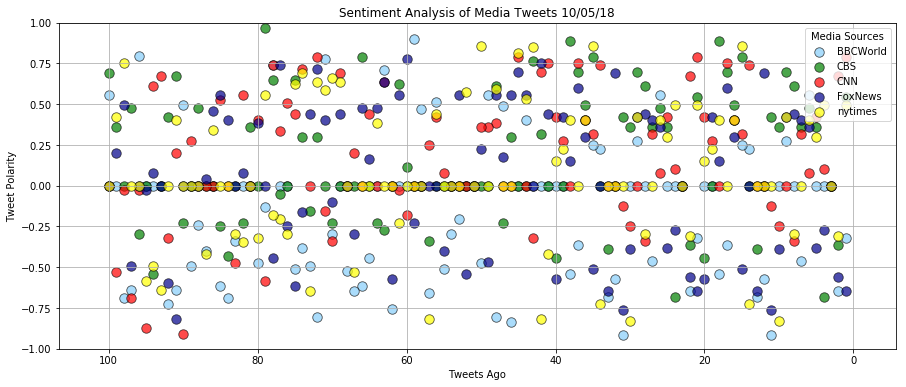

In [4]:
users = sentiment_df['User'].unique()
colors = ['lightskyblue', 'green', 'red', 'darkblue', 'yellow']

for i in range(len(users)):
    plt.scatter(x=sentiment_df[sentiment_df['User']==users[i]]['Tweets_Ago'].values,
                y=sentiment_df[sentiment_df['User']==users[i]]['Compound_Score'].values,
                s = 90,
                c = colors[i], label = users[i],
                alpha = .7, edgecolor = 'black', linewidth = .8)

plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.title("Sentiment Analysis of Media Tweets %s" % time.strftime("%x"))
plt.legend(title="Media Sources", loc='upper right')
plt.grid()
plt.gcf().set_size_inches(15, 6)
#plt.rcParams['axes.facecolor'] = 'gainsboro'
ax = plt.gca()
ax.set_xlim(ax.get_xlim()[::-1])
plt.ylim(-1, 1)
plt.savefig("Sentiment_Analysis_Tweets.png")
plt.show()




In [5]:
# Bar chart
avg_sentiment = {'User': target_users, 'Avg_Compound_Score': all_sentiment_list}
avg_sentiment_df = pd.DataFrame(avg_sentiment)
avg_sentiment_df


,User,Avg_Compound_Score
0,@BBCWorld,-0.134975
1,@CBS,0.160147
2,@CNN,0.165471
3,@FoxNews,0.051165
4,@nytimes,0.081081


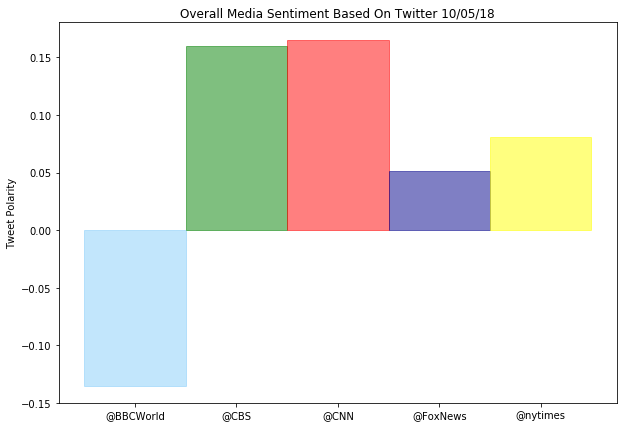

In [6]:
x_values = np.arange(len(avg_sentiment_df))
plt.figure(figsize=(10, 7))
barlist=plt.bar(x_values, avg_sentiment_df["Avg_Compound_Score"], alpha=0.5, align='center', width=1)
plt.xticks(x_values, avg_sentiment_df["User"], rotation="horizontal")
for i in range(len(barlist)):
    barlist[i].set_color(colors[i])
plt.ylabel("Tweet Polarity")
plt.title("Overall Media Sentiment Based On Twitter %s" % time.strftime("%x"))
plt.savefig("Overall_Media_Sentiment.png")
plt.show()